In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">PROJET - Bonheur </h1>
</div>

In [2]:
data = pd.read_excel("Rapport-bonheur2022.xls")
#data = pd.read_csv("Rapport-bonheur.csv")

In [3]:
data

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.8210,7.886425,7.755575,2.518052,1.891628,1.258108,0.775206,0.735590,0.108733,0.533658
1,2,Denmark,7.6362,7.709897,7.562503,2.225632,1.952595,1.242681,0.776644,0.718918,0.187626,0.532079
2,3,Iceland,7.5575,7.651076,7.463924,2.320185,1.935726,1.319914,0.802622,0.718194,0.269616,0.191204
3,4,Switzerland,7.5116,7.586394,7.436806,2.152746,2.025970,1.226074,0.822048,0.676947,0.146822,0.461004
4,5,Netherlands,7.4149,7.471265,7.358534,2.136937,1.944578,1.205848,0.786738,0.650682,0.271076,0.419083
...,...,...,...,...,...,...,...,...,...,...,...,...
142,143,Rwanda*,3.2682,3.462218,3.074182,0.536299,0.785252,0.132698,0.461527,0.621479,0.186662,0.544236
143,144,Zimbabwe,2.9951,3.109822,2.880378,0.547529,0.946604,0.690460,0.270086,0.329203,0.106265,0.104943
144,145,Lebanon,2.9553,3.048951,2.861649,0.215537,1.392068,0.497999,0.630964,0.102799,0.082191,0.033761
145,146,Afghanistan,2.4038,2.468731,2.338869,1.263403,0.757994,0.000000,0.288626,0.000000,0.088873,0.004882


In [9]:
data = data.rename(columns={"Happiness score" : "Score"})

In [10]:
data.shape

(147, 12)

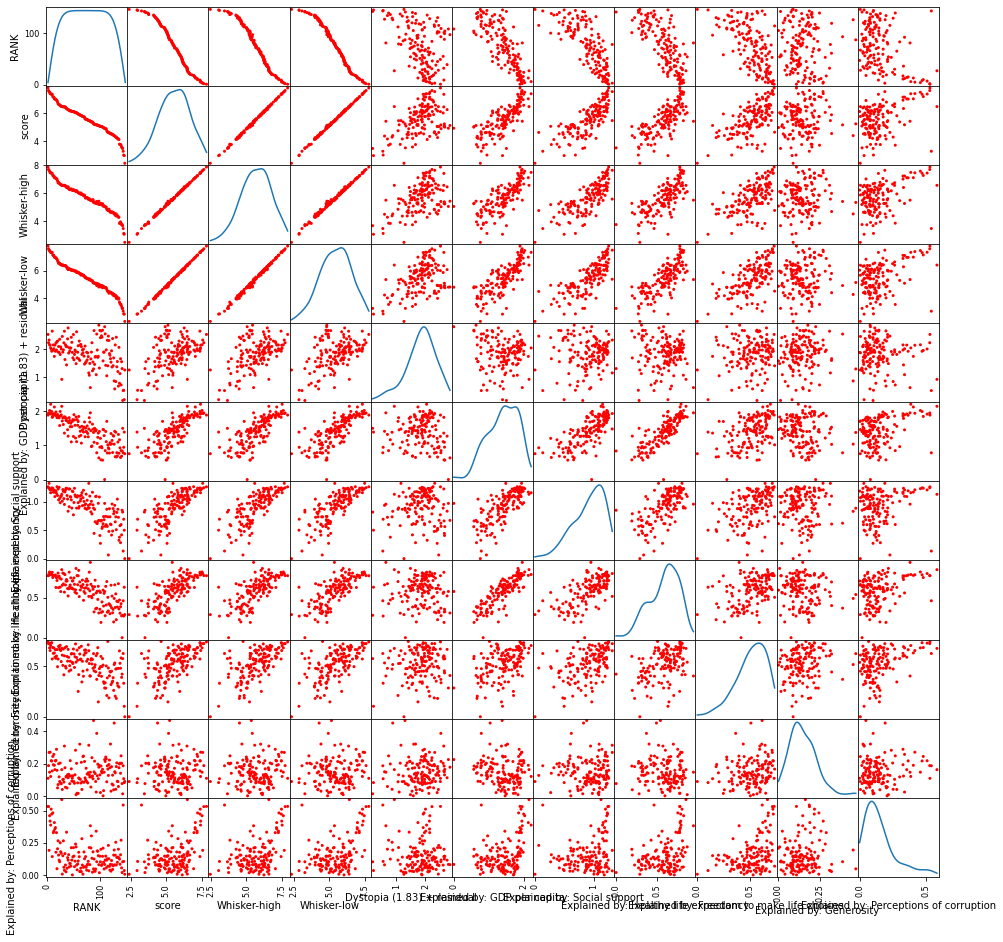

In [11]:
scatter_matrix(data.iloc[:,:], alpha = 1, figsize = (16, 16), diagonal = 'kde',color="red")
plt.show()

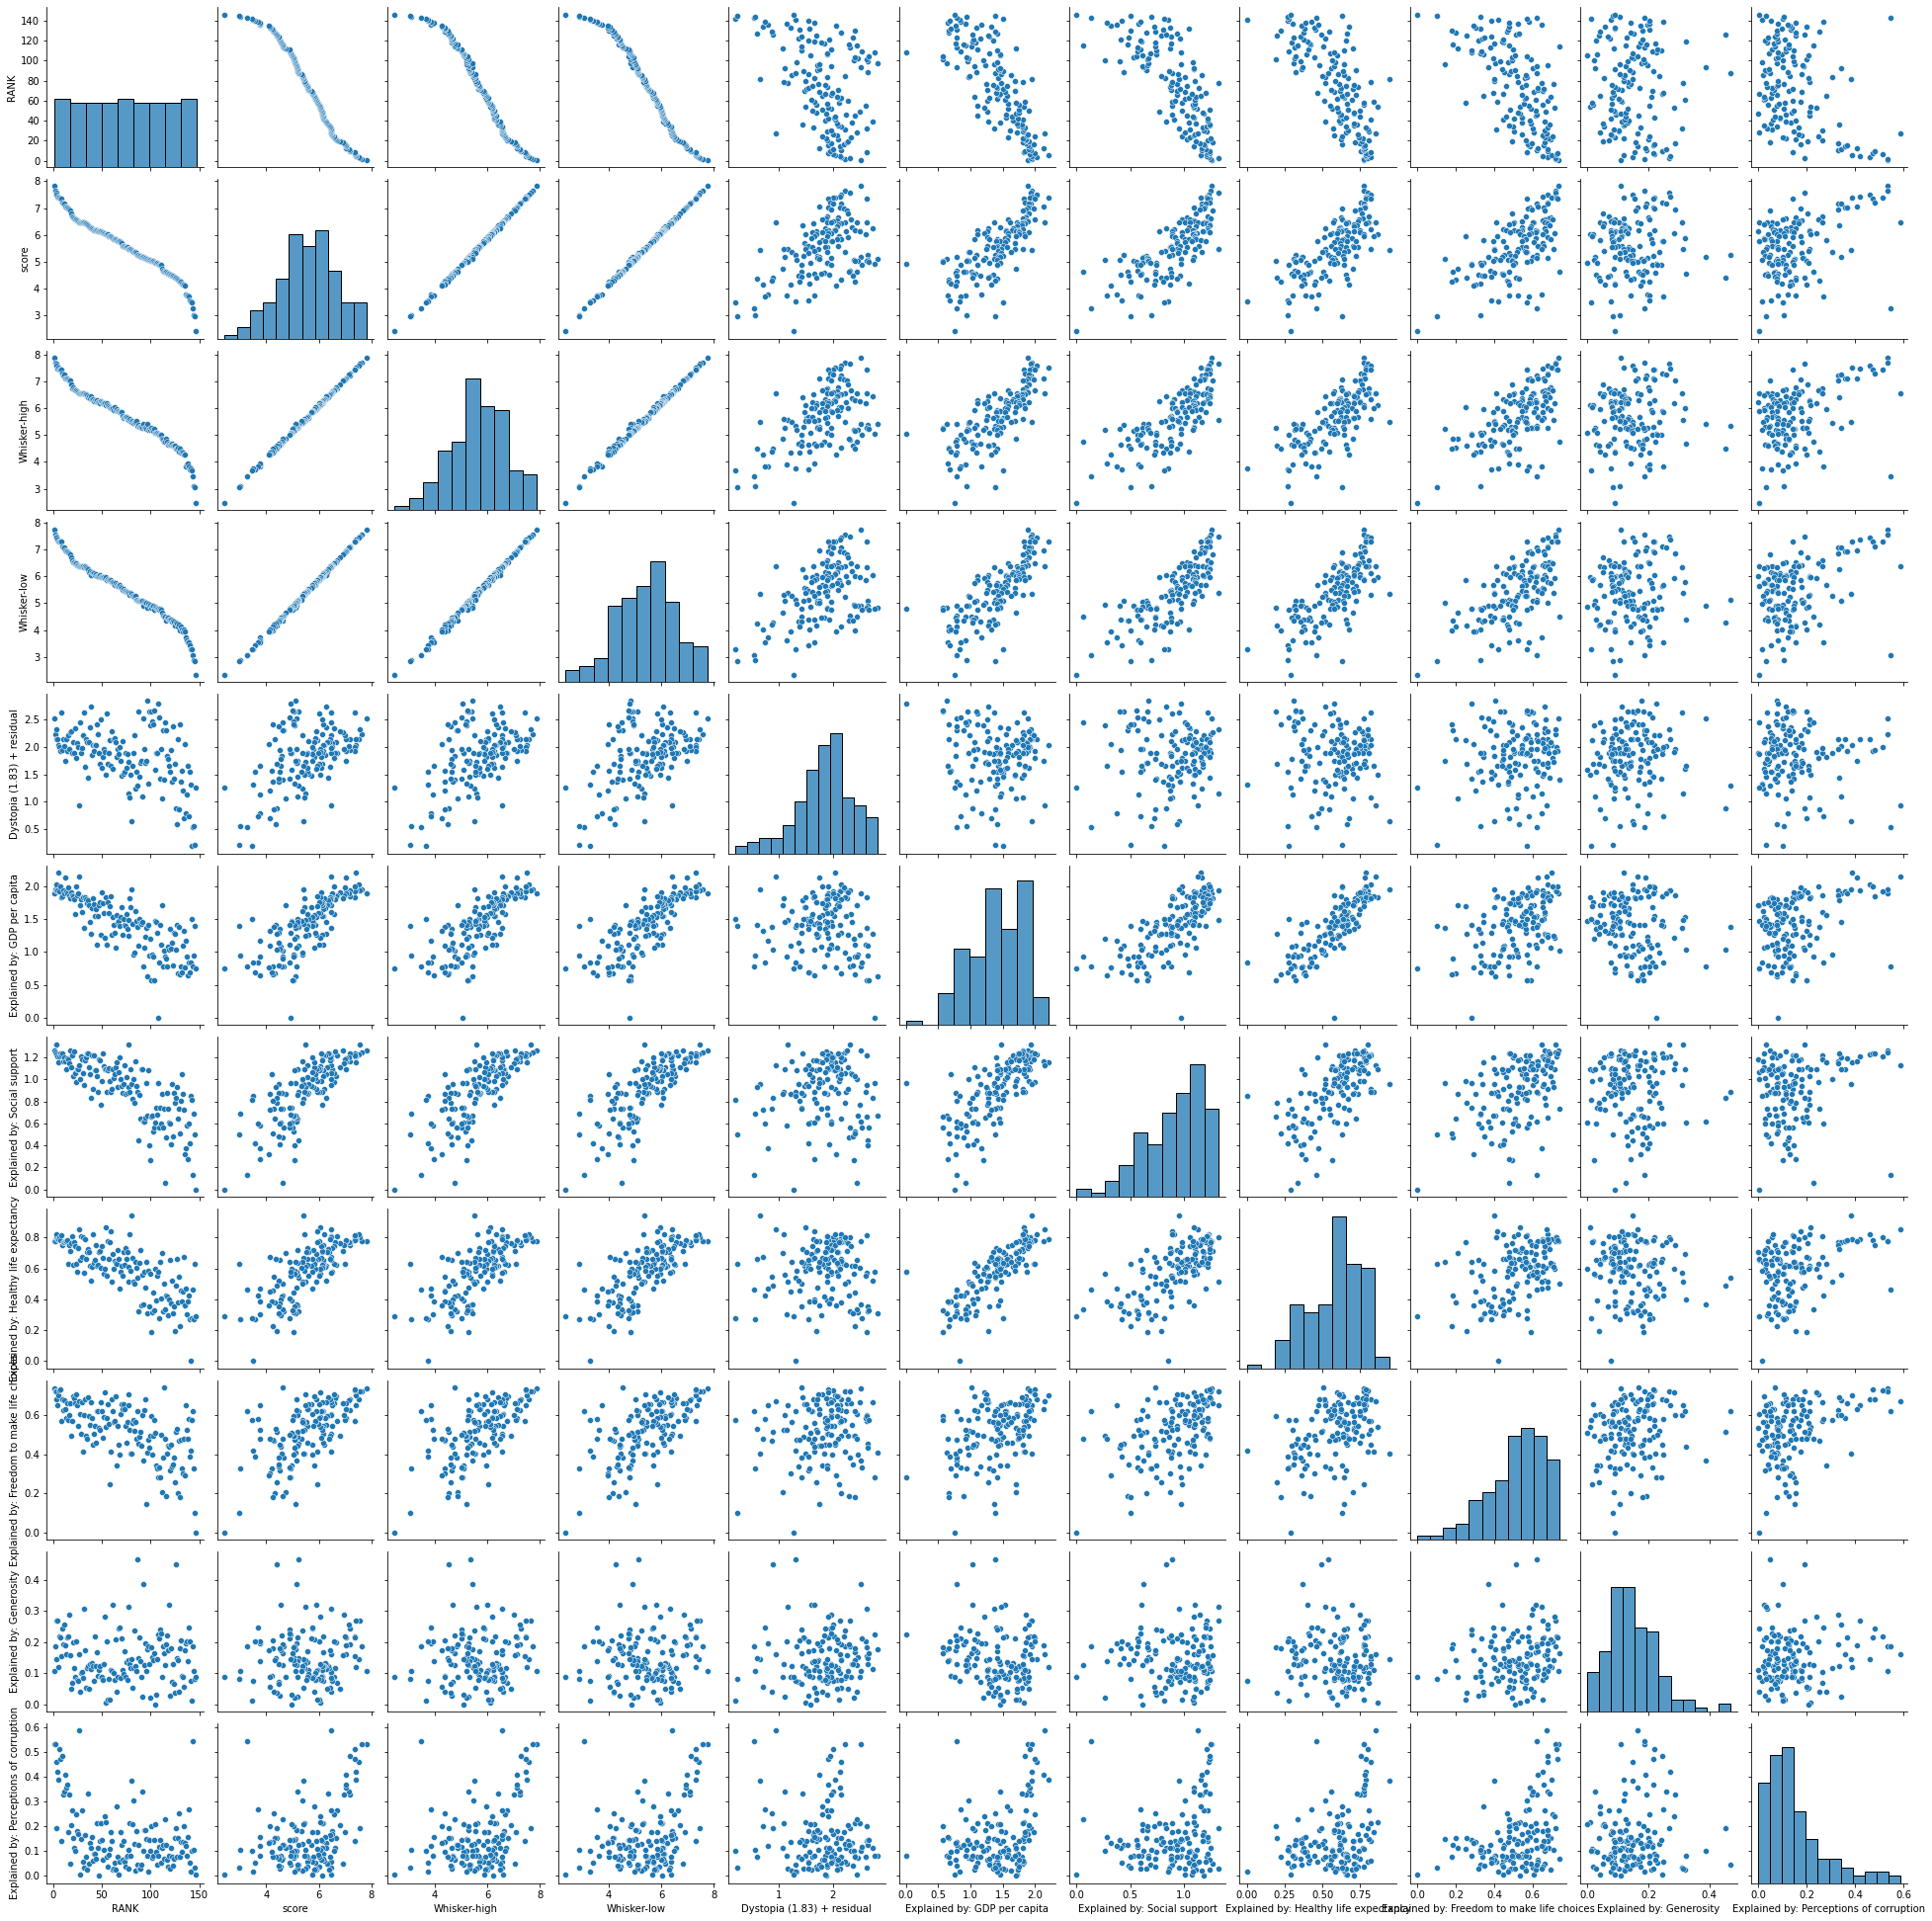

In [12]:
sns.pairplot(data)

<AxesSubplot:>

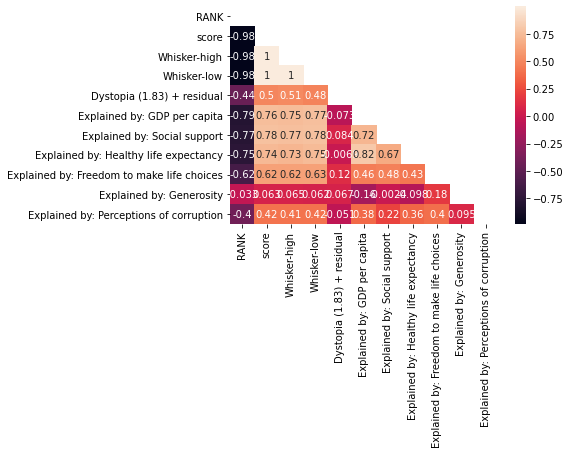

In [13]:
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, mask= matrix)

In [14]:
sns.barplot(x=data['Score'].head(10), y =data['Country or region'].head(10))

KeyError: 'Score'

In [ ]:
# data1=data.sort_values(ascending = False, by=['Social support'])
# sns.barplot(x=data1['Social support'].head(10), y =data1['Country or region'].head(10))

In [ ]:
# data1=data.sort_values(ascending = False, by=['Healthy life expectancy'])
# sns.barplot(x=data1['Healthy life expectancy'].head(10), y =data1['Country or region'].head(10))

In [ ]:
# data1=data.sort_values(ascending = False, by=['GDP per capita'])
# sns.barplot(x=data1['GDP per capita'].head(10), y =data1['Country or region'].head(10))

<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">Elbow Method</h1>
</div>

# data

In [ ]:
data1 = data.copy()
X = data1.drop(columns=['Country or region'])
region = data1['Country or region']

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [ ]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

In [ ]:

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

In [ ]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">KMEANS</h1>
</div>

In [ ]:
# 3 et 2

In [ ]:
kmeanModel = KMeans(n_clusters=2).fit(X)
kmeanModel.fit(X)
y = kmeanModel.predict(X)


In [ ]:
y

<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">TSNE</h1>
</div>

In [ ]:
from sklearn.manifold import TSNE

model = TSNE(n_components=3, random_state=0)
tab = model.fit_transform(X)


In [ ]:
bonheur = {}
bonheur['axe1'] = tab[:,0]
bonheur['axe2'] = tab[:,1]
bonheur['axe3'] = tab[:,2]
bonheur['label'] = y
bonheur['region'] = region

df2 = pd.DataFrame(bonheur)



In [ ]:
df2

In [ ]:
sns.scatterplot(data=df2, x="axe1", y="axe2",hue="label" , palette="deep")


In [ ]:
import plotly.express as px

fig = px.scatter_3d(df2, x='axe1', y='axe2', z='axe3',
              color='label',text="region" )
fig.show()

In [ ]:
df2